In [1]:
pwd

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW3/communities'

In [6]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet,SGDRegressor

# Part 1
## Linear Regression [Dataset: communities.zip]
For this problem you will experiment with linear regression models to make predictions with numerical data. You will also explore more systematic methods for feature selection and for optimizing model parameters (model selection). The data set you will use is a subset of the "Communities and Crime" data set that combines information from the 1990 census data as well as FBI crime data from 1995. Please read the full description of the data, including the description and statistics on different variables. The target attribute for regression purposes is "ViolentCrimesPerPop". The two identifier attributes "state" and "community name" should be excluded for the regression task.

Your tasks in this problem are the following [Note: for these tasks you will use the available linear-models from scikit-learn as well as the implementations of the relevant approaches from the Ch. 8 of MLA] .

### 1a) Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing functions from scikit-learn. The provided data is already normalized (see description), so there is no need for additional normalization. Compute and display basic statistics (mean, standard deviation, min, max, etc.) for each of the variables in the data set. Separate the target attribute for regression.

In [10]:
df_communities = pd.read_csv("communities.csv",na_values=['?'])

In [11]:
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [12]:
df_communities.shape

(1994, 100)

In [16]:
#To display statistics for all columns
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",df_communities.describe().shape[1])
df_communities.describe(include='all')

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,...,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1993.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330

In [19]:
missing_values = pd.DataFrame(df_communities.isnull().sum(0))
missing_values

,0
state,0
communityname,0
population,0
householdsize,0
racepctblack,0
racePctWhite,0
racePctAsian,0
racePctHisp,0
agePct12t21,0
agePct12t29,0


We can see that the count column for OtherPerCap is 1993 and the count is 1 in table above, so we have one missing value in that column.

Further, the missing value will be imposed with the mean value of the column

In [32]:
#Replacing missing values in age by mean of OtherPerCap

OtherPerCap_mean = df_communities.OtherPerCap.mean()
df_communities.OtherPerCap.fillna(OtherPerCap_mean, axis=0, inplace=True)

In [34]:
df_communities.corr()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
state,1.000000,-0.079569,-0.049505,-0.046154,0.213990,-0.318602,-0.210841,0.100622,0.036950,0.051230,0.007792,-0.084959,-0.103736,-0.131495,0.007474,0.087935,0.058810,0.057293,-0.102243,0.008768,-0.117277,-0.140462,-0.180043,-0.134398,-0.072144,-0.076913,-0.099995,-0.095906,-0.044771,0.034205,-0.003427,-0.001186,-0.042335,-0.038888,-0.009722,0.095885,0.084766,-0.104680,-0.077217,-0.182710,-0.145359,-0.055681,0.079524,0.106835,0.046516,0.089345,0.016129,0.057080,-0.056622,-0.115161,-0.181851,-0.063404,-0.100041,-0.105377,-0.108938,-0.313309,-0.324050,-0.332248,-0.332851,0.245503,-0.235491,-0.159394,-0.149810,-0.081082,-0.001181,-0.176310,0.080695,-0.268912,-0.158962,0.094380,-0.074597,0.023181,0.039883,0.076888,0.270514,-0.143080,0.093658,0.016513,-0.367460,-0.365265,-0.359293,-0.289990,-0.305592,-0.308541,-0.297659,-0.286034,-0.360503,0.203010,-0.060099,-0.119553,-0.356149,0.340611,0.151854,0.062087,0.127616,-0.040350,-0.137940,-0.021431,-0.211398
population,-0.079569,1.000000,-0.046148,0.231178,-0.300845,0.181603,0.156218,0.006368,0.130344,0.075596,-0.102006,0.993112,0.239446,-0.101615,0.004512,-0.130692,-0.150788,-0.120253,0.177172,-0.093911,-0.105370,-0.055656,0.037044,-0.059646,-0.017264,-0.081033,-0.031002,-0.083065,0.947598,0.162004,0.036706,0.057031,-0.003418,0.145247,-0.005217,-0.106284,0.021769,0.232603,0.247567,0.258529,0.248099,0.086666,-0.266341,-0.273558,-0.226710,-0.263348,-0.037165,-0.090191,0.885178,0.332564,0.741593,0.139745,0.156336,0.182920,0.207559,0.199765,0.201221,0.207268,0.211653,-0.168376,0.181610,0.190308,0.123572,-0.036567,-0.003476,0.031548,-0.247854,0.205913,0.218492,-0.205286,0.896324,-0.089887,-0.253136,0.326142,-0.085401,-0.056666,0.061482,0.108046,-0.012131,0.000689,0.018575,-0.006479,-0.009835,0.004060,-0.024675,0.130430,0.083214,-0.037976,0.821243,0.651797,0.172731,-0.125133,-0.123691,0.001610,-0.089638,0.713652,0.231897,0.270356,0.367157
householdsize,-0.049505,-0.046148,1.000000,-0.067109,-0.235907,0.201996,0.468659,0.520461,0.367338,0.295225,-0.612666,-0.047581,-0.015739,0.209431,0.440269,0.182579,-0.155101,-0.451412,0.115204,-0.324700,0.111438,-0.130716,-0.131671,0.042506,-0.007850,-0.055818,0.016719,-0.085088,-0.030139,0.055085,0.172144,0.100286,-0.033412,0.143811,0.113240,0.023287,-0.084040,-0.449461,0.154911,-0.349128,-0.409331,0.845514,0.283067,0.205665,0.199644,0.269767,-0.225673,-0.268500,-0.031316,0.020711,0.105828,0.028751,0.051887,0.069203,0.103577,0.275237,0.288425,0.295677,0.306491,-0.418950,0.416072,0.661575,0.741099,0.892978,0.825000,0.725371,0.138005,0.501638,-0.331717,0.221582,-0.175594,0.230174,0.192774,0.051490,-0.037004,0.253885,-0.007921,0.143368,0.134584,0.123739,0.100420,0.150031,0.1

In [36]:
df_communities.describe(include='all')

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,...,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greenvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,0.423164,0.064072,0.696269,0.361123,0.558154,0.291570,0.495687,0.471133,0.317778,0.479248,0.375677,0.350251,0.368049,0.291098,0.203506,0.322357,0.284742,0.386279,0.055507,0.303024,0.315807,0.383330

The missing value for the OtherPerCap is replaced and the basic statistics for all columns is shown above. There are NO missing values.

Now seperating the target variables and the predictors, we need to remove "state" and "communityname" as we are not using those variables. 

In [38]:
df_communities_X = df_communities.drop(['state','communityname','ViolentCrimesPerPop'], inplace = False, axis=1)
df_communities_Y = df_communities['ViolentCrimesPerPop']

In [39]:
df_communities_X.shape

(1994, 97)

In [40]:
df_communities_Y.shape

(1994,)

In [41]:
df_communities_X.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [42]:
df_communities_Y.head()

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

### 1b) Perform standard linear regression on data using the implementation for Ch. 8 of MLA. Compute the RMSE value on the full training data. Also, plot the correlation between the predicted and actual values of the target attribute. Display the obtained regression coefficients (weights). Finally, perform 10-fold cross-validation and compare the cross-validation RMSE to the training RMSE (for cross validation, you may use the KFold module from sklearn.cross_validation).

In [46]:
from numpy import *
def standRegres(xArr,yArr):
    xMat = mat(xArr); yMat = mat(yArr).T
    xTx = xMat.T*xMat
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [47]:
x_var = np.array(df_communities_X)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
x_var

array([[ 0.19,  0.33,  0.02, ...,  0.26,  0.2 ,  1.  ],
       [ 0.  ,  0.16,  0.12, ...,  0.12,  0.45,  1.  ],
       [ 0.  ,  0.42,  0.49, ...,  0.21,  0.02,  1.  ],
       ..., 
       [ 0.16,  0.37,  0.25, ...,  0.32,  0.18,  1.  ],
       [ 0.08,  0.51,  0.06, ...,  0.38,  0.33,  1.  ],
       [ 0.2 ,  0.78,  0.14, ...,  0.3 ,  0.05,  1.  ]])

In [48]:
y_var = np.array(df_communities_Y)
y_var

array([ 0.2 ,  0.67,  0.43, ...,  0.23,  0.19,  0.48])

In [52]:
ws = standRegres(x_var,y_var)
print("The coefficients are - \n",ws)

The coefficients are - 
 [[  1.31108068e-01]
 [ -3.14114977e-02]
 [  2.09909670e-01]
 [ -4.05351612e-02]
 [ -1.38892919e-02]
 [  5.89726825e-02]
 [  1.23399025e-01]
 [ -2.22621600e-01]
 [ -1.47500199e-01]
 [  5.01635477e-02]
 [ -2.42413829e-01]
 [  4.64024392e-02]
 [ -1.96945615e-01]
 [ -2.06117500e-01]
 [  4.65935490e-02]
 [ -1.77212915e-01]
 [  6.30148504e-02]
 [  1.14942190e-02]
 [ -9.08951848e-02]
 [  2.74640044e-01]
 [  1.01752476e-01]
 [ -3.31517562e-01]
 [ -2.91799268e-02]
 [ -3.54483393e-02]
 [  2.26173855e-02]
 [  4.30950137e-02]
 [  3.44408548e-02]
 [  1.28412458e-01]
 [ -1.91293360e-01]
 [ -1.00769002e-01]
 [  6.46856092e-02]
 [  1.06062117e-01]
 [  2.44126000e-06]
 [  2.34984611e-01]
 [ -3.75705330e-02]
 [ -7.74957660e-03]
 [  4.66779619e-01]
 [  2.26295907e-01]
 [  1.74621953e-01]
 [ -5.75206227e-01]
 [ -1.41954207e-01]
 [  5.68782538e-02]
 [ -3.51066745e-01]
 [ -3.49493414e-02]
 [  4.63705978e-04]
 [  5.57016681e-02]
 [ -1.82238360e-01]
 [ -1.54646442e-01]
 [  1.26172899e

In [53]:
yHat = x_var*ws
yHatT = yHat.T
yHat[:10]

matrix([[ 0.16551838],
        [ 0.29062973],
        [ 0.38367799],
        [ 0.32270857],
        [-0.02129155],
        [ 0.23017938],
        [ 0.08800201],
        [ 0.4423392 ],
        [ 0.23747971],
        [ 0.00526097]])

In [54]:
err = abs(yHatT - y_var)
err[:10]

matrix([[ 0.03448162,  0.37937027,  0.04632201, ...,  0.17142767,
          0.02117355,  0.10673053]])

In [55]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err.T)
# Compute RMSE
rmse_train = np.sqrt(total_error/len(yHat))
print(rmse_train)

[[ 0.12888961]]


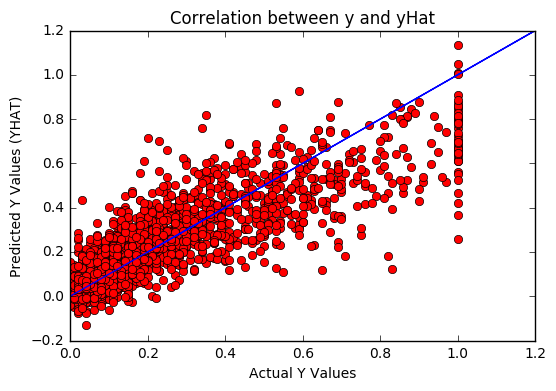

In [58]:
#Displaying the correlation between actual and predicted y values
plt.plot(y_var, yHat, 'ro')
plt.plot([0,1.2,0.2],[0,1.2,0.2])
plt.title('Correlation between y and yHat')
plt.xlabel('Actual Y Values')
plt.ylabel('Predicted Y Values (YHAT)')
plt.show()

In [60]:
#Displaying the correlation co-efficient 
corrcoef(yHatT,y_var)

array([[ 1.        ,  0.83294957],
       [ 0.83294957,  1.        ]])

From the above graph and table, we can see that the correlation coefficient is high i.e. 0.83294 and the actual-predicted values are highly correlated.

In [61]:
#Dispalying regression coefficients
print(ws)

[[  1.31108068e-01]
 [ -3.14114977e-02]
 [  2.09909670e-01]
 [ -4.05351612e-02]
 [ -1.38892919e-02]
 [  5.89726825e-02]
 [  1.23399025e-01]
 [ -2.22621600e-01]
 [ -1.47500199e-01]
 [  5.01635477e-02]
 [ -2.42413829e-01]
 [  4.64024392e-02]
 [ -1.96945615e-01]
 [ -2.06117500e-01]
 [  4.65935490e-02]
 [ -1.77212915e-01]
 [  6.30148504e-02]
 [  1.14942190e-02]
 [ -9.08951848e-02]
 [  2.74640044e-01]
 [  1.01752476e-01]
 [ -3.31517562e-01]
 [ -2.91799268e-02]
 [ -3.54483393e-02]
 [  2.26173855e-02]
 [  4.30950137e-02]
 [  3.44408548e-02]
 [  1.28412458e-01]
 [ -1.91293360e-01]
 [ -1.00769002e-01]
 [  6.46856092e-02]
 [  1.06062117e-01]
 [  2.44126000e-06]
 [  2.34984611e-01]
 [ -3.75705330e-02]
 [ -7.74957660e-03]
 [  4.66779619e-01]
 [  2.26295907e-01]
 [  1.74621953e-01]
 [ -5.75206227e-01]
 [ -1.41954207e-01]
 [  5.68782538e-02]
 [ -3.51066745e-01]
 [ -3.49493414e-02]
 [  4.63705978e-04]
 [  5.57016681e-02]
 [ -1.82238360e-01]
 [ -1.54646442e-01]
 [  1.26172899e-01]
 [ -1.44320569e-01]


In [63]:
kf = KFold(len(x_var), n_folds=10)

total_error = 0

for train,test in kf:
    ws = standRegres(x_var,y_var)
    yHat = x_var*ws
    yHatT = yHat.T
    err = abs(yHatT - y_var)
    total_error += np.dot(err,err.T)
rmse_10cv = np.sqrt(total_error/len(yHat)) 

In [64]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.4076


From the results above, we can see that RMSE has increased to 0.4076 after 10 fold Cross validation.

### 1c) Feature Selection:  use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression. For feature selection, write a script or function that takes as input the training data, target attribute; the model; and any other parameters you find necessary, and returns the optimal percentage of the most informative features to use. Your approach should use k-fold cross-validation on the training data (you can use k=5). You can use feature_selection.SelectPercentile to find the most informative variables. Show the list of most informative variables and their weights [Note: since this is regression not classification, you should use feature_selection.f_regression as scoring function rather than chi2). Next, plot the model's mean absolute error values  on cross-validation relative to the percentage of selected features (See scikit-learn's metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with regression you'll need to pass to it scoring='mean_absolute_error' as a parameter. [Hint: for an example of a similar feature selection process please review the class example notebook. Also, review scikit-learn documentation for feature selection.]

In [67]:
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.

1 0.112874011634
6 0.0994326847568
11 0.0990051051913
16 0.0990905907953
21 0.0975068622131
26 0.0953491504359
31 0.0949219464329
36 0.09474955355
41 0.0943537042886
46 0.0946644176057
51 0.0950510935611
56 0.095425738239
61 0.0957448325477
66 0.0956304581436


/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_absolute_error was renamed to neg_mean_absolute_error in version 0.18 and will be removed in 0.20.

71 0.0958313222977
76 0.0951684772345
81 0.0954808934779
86 0.0951636854361
91 0.0953146310011
96 0.0953334504738
Optimal percentile of features:41 

Optimal number of features:39 



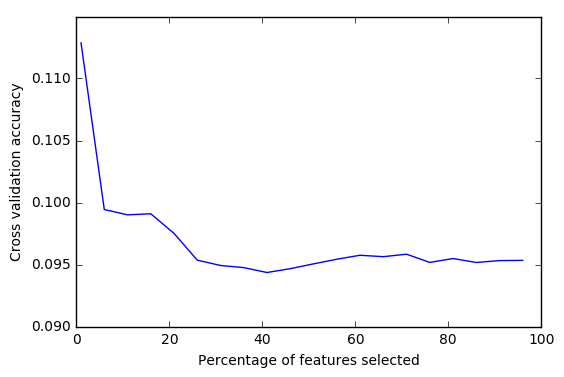

In [69]:
x_var = np.array(df_communities_X)
x_var = np.array([np.concatenate((v,[1])) for v in x_var])
y_var = np.array(df_communities_Y).T

x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=33)

linreg = LinearRegression()
percentiles = range(1, 100, 5)
results = []
for i in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
    x_train_fs = fs.fit_transform(x_train, y_train)
    scores = abs(cross_validation.cross_val_score(linreg, x_train_fs, y_train, cv=5, scoring='mean_absolute_error'))
    print (i,scores.mean())
    results = np.append(results, scores.mean())

optimal_percentile = np.where(results == results.min())[0]
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
optimal_num_features = int(floor(percentiles[optimal_percentile]*len(df_communities_X.columns)/100))
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results,label=' Best Percentile Graph')

The optimal percentile of features is 41 and optimal number of features is 39

In [70]:
#Using optimal percentile
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)

In [74]:
for i in range(len(df_communities_X.columns.values)):
    if fs.get_support()[i]:
        print (df_communities_X.columns.values[i],'\t', fs.scores_[i])

population 	 256.032354737
racepctblack 	 1074.88950927
racePctWhite 	 1412.50781239
numbUrban 	 247.776138548
medIncome 	 341.632537523
pctWWage 	 161.570750942
pctWInvInc 	 756.014972331
pctWPubAsst 	 784.570640809
medFamInc 	 366.900421844
perCapInc 	 214.993157991
NumUnderPov 	 400.307856891
PctPopUnderPov 	 578.817365214
PctLess9thGrade 	 319.218108102
PctNotHSGrad 	 472.196207869
PctBSorMore 	 173.366843184
PctUnemployed 	 533.913152199
PctEmploy 	 190.465262464
MalePctDivorce 	 602.774893582
FemalePctDiv 	 704.772739005
TotalPctDiv 	 693.137830382
PctFam2Par 	 1657.865017
PctKids2Par 	 1972.80406387
PctYoungKids2Par 	 1342.17361379
PctTeen2Par 	 1299.53510584
NumIlleg 	 431.635560269
PctIlleg 	 1936.12087378
PctLargHouseFam 	 241.23381636
PctPersOwnOccup 	 630.760339374
PctPersDenseHous 	 375.645901876
PctHousLess3BR 	 487.961680842
MedNumBR 	 242.066429948
HousVacant 	 339.968618162
PctHousOccup 	 173.739417017
PctHousOwnOcc 	 478.530429718
PctVacantBoarded 	 507.636408542
PctH

In [76]:
# Calculating Mean absolute Error on the testing using 39 informatic features :
from sklearn.metrics import mean_absolute_error

fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=41)
x_train_fs = fs.fit_transform(x_train, y_train)
linreg = LinearRegression()
linreg.fit(x_train_fs, y_train)
x_test_fs = fs.transform(x_test)
lr_pred = linreg.predict(x_test_fs)
lr_mae = mean_absolute_error(y_test, lr_pred)

print ('Mean absolute Error (MAE) of the testing data is %0.8f' % lr_mae)

Mean absolute Error (MAE) of the testing data is 0.10127083


So using the best set of features and running the model with that feature subset on the test data we get MAE of 0.10127083.

### 1d) Next, perform Ridge Regression and Lasso Regression, however this time use the modules from sklearn.linear_model. In each case, perform systematic model selection to identify the optimal alpha parameter. First, create a 20%-80% randomized split of the data. Set aside the test portion; the model selection process should be performed using the 80% training data partition. You should create a function that takes as input the data and target attribute; the parameter to vary and a list of its values; the model to be trained; and any other relevant input needed to determine the optimal value for the specified parameter. The model selection process should perform k-fold cross validation (k should be a parameter, but you can select k=5 for this problem). You should also plot the error values on the training and cross-validation splits across the specified values of the alpha parameter. Finally, using the best alpha value, run the model on the set-aside test data. Discuss your observation and conclusions. [Hint: for an example of a similar model selection process please review the class example notebook.]

In [78]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_absolute_error

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_var, y_var, test_size=0.2, random_state=33)

In [80]:
def calc_params(x, y, param_name, param_values, K, model, model_name):
    
    # Convert input to Numpy arrays
    x = np.array(x)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        
        # set classifier parameters
        model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(x), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            model.fit([x[k] for k in train], y[train])
            train_predict = model.predict(x[train])
            test_predict = model.predict(x[test])
            
            k_train_scores = mean_absolute_error(y[train], train_predict)
            k_test_scores = mean_absolute_error(y[test], test_predict)
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        
        #print ("Alpha:",param_value)
        #print ("MAE Cross Validation Train:", train_scores[i])
        #print ("MAE Cross Validation Test:", test_scores[i])
        #print ('\n')
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='r')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean Cross Validation Error")
    plt.title(model_name)
    
    min_err_idx = np.where(test_scores == test_scores.min())
    min_err_alpha = param_values[min_err_idx]
    print ('The minimum MAE using cross validation is:', test_scores[min_err_idx][0],'with', param_name,':', min_err_alpha[0])

In [81]:
#alpha values
alpha = np.linspace(0.01, 200, 200)
alpha = np.array([float(e) for e in alpha])

In [82]:
#Ridge and Lasso from sklean
ridge = Ridge()
lasso = Lasso()

The minimum MAE using cross validation is: 0.0957056110913 with alpha : 3.02492462312


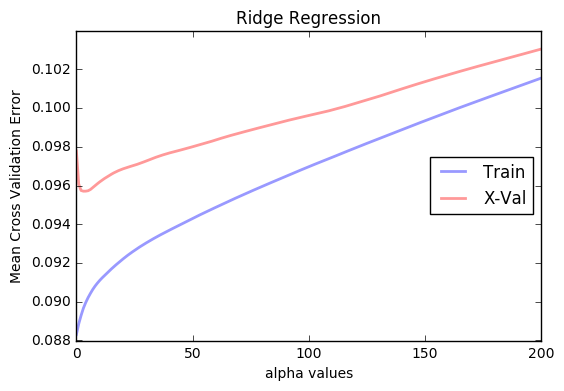

In [83]:
#Ridge Regression
calc_params(x_train, y_train, "alpha", alpha, 5, ridge, "Ridge Regression")

So we can see that the alpha value of 3.02492462312 gives the lowest MAE on training data and we can use that to run the model on set aside test data.

In [84]:
ridge = Ridge(fit_intercept=True, alpha=3.02492462312)
ridge.fit(x_train, y_train)    
pred = ridge.predict(x_test)
MAE = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % MAE,'using alpha = 3.02492462312')

Mean absolute error on test data: 0.02076757 using alpha = 3.02492462312


The minimum MAE using cross validation is: 0.109033016481 with alpha : 0.01


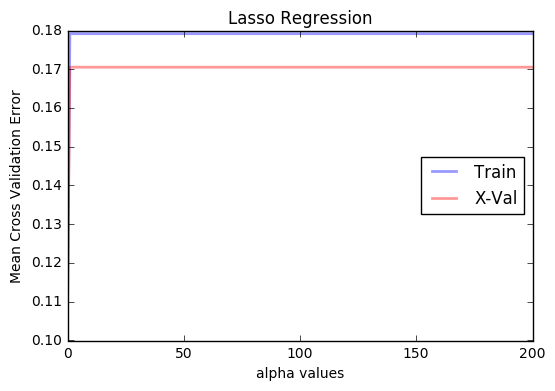

In [85]:
#Lasso Regression
calc_params(x_train, y_train, "alpha", alpha, 5, lasso, "Lasso Regression")

So we can see that the alpha value of 0.01 gives the lowest MAE on training data and we can use that to run the model on set aside test data.


In [86]:
lasso = Lasso(fit_intercept=True, alpha=0.01)
lasso.fit(x_train, y_train)    
pred = lasso.predict(x_test)
MAE = mean_squared_error(y_test, pred)
print('Mean absolute error on test data: %0.8f' % MAE,'using alpha = 0.01')

Mean absolute error on test data: 0.02698041 using alpha = 0.01


1) Ridge Regression

For ridge regression, we can see that the lowest MAE we get on cross validation is when alpha is 3.02492462312, MAE starts to decrease for alpha values from 0.01 to 3.02492462312 but after that it starts to increase. For alpha = 0.01 we are overfitting the model for Ridge Regression and then if we still increase the alpha after 3.02492462312 we see that both training and X-val MAE increases which shows that we might underfit the model if we take higher values of alpha, so alpha = 3.02492462312 is where we get the best fit model. Using that value of alpha the MAE we get on set aside test data set is 0.02076757.

2) Lasso Regression

For lasso regression, we can see that the lowest MAE we get on cross validation is for alpha = 0.01. MAE increases as we increase the value of alpha and reaches a point where it remains the same for alpha value greater than 0.01, so alpha = 0.01 is where we get the best fit model. Using that value of alpha the MAE we get on set aside test data set is 0.02698041.
So we can see that the MAE values on the test data set using both Ridge and Lasso regression is almost same but the MAE for Ridge Regression is less than that for Lasso Regression and so Ridge Regression is better choice for this dataset.

### 1e) Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start with creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [91]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
#Standardizing the data

scaler = StandardScaler()
scaler.fit(x_var)
x_std = scaler.transform(x_var)
x_train, x_test, y_train, y_test = train_test_split(x_std, y_var, test_size=0.2, random_state=33)

In [92]:
#Stochastic Gradient Descent
sgd = SGDRegressor()

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.0001, 200, 400),
}

gs = GridSearchCV(sgd, parameters, verbose=1, cv=5)

In [93]:
#Run the grid search
%time _ = gs.fit(x_train, y_train)

gs.best_params_, gs.best_score_

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
CPU times: user 1min 37s, sys: 1.34 s, total: 1min 38s
Wall time: 24.9 s


[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed:   24.8s finished


({'alpha': 0.0001, 'penalty': 'l2'}, 0.65383190061957197)

In [95]:
for (i, j) in gs.best_params_.items():
    sgd.set_params(**{i:j})
    print ("The optimum value of", i, "is estimated as", j)

The optimum value of alpha is estimated as 0.0001
The optimum value of penalty is estimated as l2


In [96]:
#Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='l1', alpha=0.0001)
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_squared_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'l1' and alpha equals to 0.0001")

MAE on set-aside test data set: 0.02116727 with penalty equals to 'l1' and alpha equals to 0.0001


Model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with the "elasticnet" penalty parameter. The calc_params function I have created above can take any models and any paramters so using the same function to do the model selection to find the best value for "l1_ratio" when penalty="elasticnet".

The minimum MAE using cross validation is: 0.094836439651 with l1_ratio : 0.494950505051


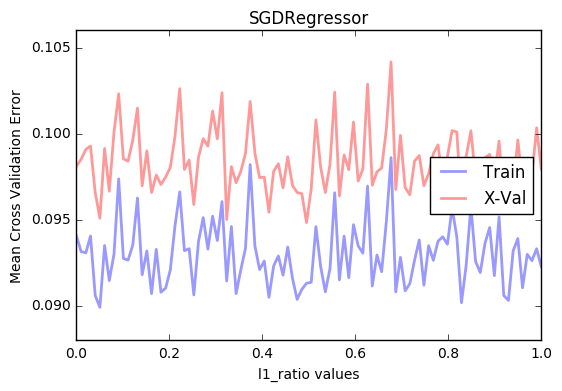

In [99]:
l1_ratio_range = np.linspace(0.0001,0.9999, 100)

sgd = SGDRegressor(penalty='elasticnet')
calc_params(x_train, y_train, "l1_ratio", l1_ratio_range, 5, sgd, "SGDRegressor")

So we can see that the l1_ratio value of 0.494950505051 gives the lowest MAE on training data and we can use that to run the model on set aside test data with "elasticnet" as the penalty parameter.

In [100]:
#Using the best parameters, apply the model to the set-aside test data
sgd = SGDRegressor(penalty='elasticnet', l1_ratio=0.494950505051)
sgd.fit(x_train, y_train)
pred = sgd.predict(x_test)
MAE = mean_squared_error(y_test, pred)

print ('MAE on set-aside test data set: %0.8f' % MAE, "with penalty equals to 'elasticnet' and l1_ratio = 0.494950505051")

MAE on set-aside test data set: 0.02152759 with penalty equals to 'elasticnet' and l1_ratio = 0.414158585859


From Stochastic Gradient Descent for regression we can see that the lowest MAE we get on cross validation is for l1_ratio = 0.494950505051. MAE increases as we increase the value of l1_ratio, so l1_ratio = 0.494950505051 is where we get the best fit model when penalty = "elasticnet". Using that value of l1_ratio the MAE we get on set-aside test data set is 0.02152759.

The MAE values on cross validation using the best parameters for Ridge, Lasso and SGD Regression are:

1) Ridge: 0.0957056110913

2) Lasso: 0.109033016481

3) SGD:  0.094836439651

The MAE values on the test data set using the best parameters for Ridge, Lasso and SGD Regression are:

1) Ridge: 0.02076757

2) Lasso: 0.02698041

3) SGD: 0.02152759

The MAE values on the test data set using Ridge, Lasso and SGD regression is almost the same but the MAE for Ridge Regression is lowest followed by MAE for SGD and Lasso and so Ridge Regression is better choice for this dataset.

Please Note: The values like best penalty parameter that we get when doing grid search CV and the best l1_ratio we get after doing model selection (as in 1d) might vary when it is executed on different machines and different executions (so this might change the training cross validation and test MAE's for any of the regression), I faced this and thus keeping the last values I got during the last execution before submission in conclusions.

## Part 2
## Automatic Document Clustering [Dataset: newsgroups5.zip]

For this problem you will use a different subset of the 20 Newsgroup data set that you used in Assignment 2  (see the description of the full dataset). The subset for this assignment includes 2,500 documents (newsgroup posts), each belonging to one of 5 categories windows (0), crypt (1), christian (2), hockey (3), forsale (4). The documents are represented by 9328 terms (stems). The dictionary (vocabulary) for the data set is given in the file "terms.txt" and the full term-by-document matrix is given in "matrix.txt" (comma separated values). The actual category labels for the documents are provided in the file "classes.txt". Your goal in this assignment is to perform clustering on the documents and compare the clusters to the actual categories.

Your tasks in this problem are the following [Note: for the clustering part of this assignment you should use the kMeans module form Ch. 10 of MLA (use the version provided here as it includes some corrections to the book version). You may also use Pandas and other modules from scikit-learn that you may need for preprocessing or evaluation.]

### 2a) Create your own distance function that, instead of using Euclidean distance, uses Cosine similarity. This is the distance function you will use to pass to the kMeans function.

In [101]:
def cosSim(x, D):
    x_norm = np.linalg.norm(x)
    D_norm = np.linalg.norm(D)
    similarity = np.dot(D,x)/(D_norm * x_norm)
    dists = 1- similarity
    return dists

### 2b) Load the data set [Note: the data matrix provided has terms as rows and documents as columns. Since you will be clustering documents, you'll need to take the transpose of this matrix so that your main data matrix is a document x term matrix. In Numpy, you may use the ".T" operation to obtain the transpose.] Then, split the data set (the document x term matrix) and set aside 20% for later use (see below). Use the 80% segment for clustering in the next part. The 20% portion must be a random subset.

In [102]:
pwd

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW3/communities'

In [103]:
cd '/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW3/newsgroups5'

/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/CSC478 - Assignments/HW3/newsgroups5


In [105]:
#Load data from files
doc_term = pd.DataFrame(np.genfromtxt("matrix.txt", delimiter=',',dtype=int).T)
classes = pd.DataFrame(np.genfromtxt("classes.txt", delimiter=' ',dtype=int,skip_header=1))
terms = np.array(pd.DataFrame(np.genfromtxt("terms.txt", delimiter='\t',dtype=str)))

In [106]:
doc_term.shape

(2500, 9328)

In [107]:
terms

array([['aa'],
       ['aargh'],
       ['aaron'],
       ..., 
       ['zw'],
       ['zx'],
       ['zz']], dtype=object)

In [108]:
terms.shape

(9328, 1)

In [109]:
classes = classes.drop(classes.columns[0], axis=1)
classes.head()

,1
0,0
1,1
2,1
3,1
4,2


In [110]:
#Split the data set 80%-20%
doc_term_train, doc_term_test, classes_train, classes_test = train_test_split(doc_term, classes, test_size=0.2, random_state=33)

In [111]:
doc_term_train.shape

(2000, 9328)

In [112]:
doc_term_test.shape

(500, 9328)

### 2c) As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure to maintain DF values for each of the terms in the dictionary. [Note: if you run into problems due to limited computational resources, you may prune the data by removing all terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to maintain the correspondence between the dictionary terms and the matrix rows.]

In [113]:
DT = doc_term_train
TD = doc_term_train.T

DT_test = doc_term_test
TD_test = doc_term_test.T

DF = np.array([(TD!=0).sum(1)]).T

numDocs = DT.shape[0]
numTerms = DT.shape[1]
termFreqs = doc_term_train.sum(axis=1)

NMatrix = np.ones(np.shape(TD), dtype=float)*numDocs

IDF = np.log2(np.divide(NMatrix, DF))

TD_TFIDF_train = np.array(TD * IDF)
DT_TFIDF_train = TD_TFIDF_train.T

TD_TFIDF_test = np.array(TD_test * IDF[:,:500])
DT_TFIDF_test = TD_TFIDF_test.T

DT_TFIDF_train[np.isnan(DT_TFIDF_train)] = 0
DT_TFIDF_test[np.isnan(DT_TFIDF_test)] = 0
DT_TFIDF_train[DT_TFIDF_train == inf] = 0
DT_TFIDF_train[DT_TFIDF_train == -inf] = 0
DT_TFIDF_test[DT_TFIDF_test == inf] = 0
DT_TFIDF_test[DT_TFIDF_test == -inf] = 0

### 2d) Perform Kmeans clustering on the training data. Write a function to display the top N terms in each cluster along with the cluster DF values for each term and the size of the cluster. Cluster DF value for a term t in a cluster C is the percentage of docs in cluster C in which term t appears. Sort the terms in decreasing order of the DF percentage. Here is an example of how this output might look like (here the top 10 terms for 3 of the 5 clusters are displayed in decreasing order of cluster DF values, but the mean frequnecy from the cluster centroid is also shown). [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [114]:
#implementation from Chapter-10
from numpy import *

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = zeros((k,n), dtype=float)
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * random.rand(k)
        
    return centroids 

def kMeans(dataSet, k, distMeas=cosSim, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = zeros((m,2))
    #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2

        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0]==cent)[0]] #get all the point in this cluster - Note: this was incorrect in the original distribution.
            if(len(ptsInClust)!=0):
                centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean - Note condition was added 10/28/2013
    return centroids, clusterAssment

def biKmeans(dataSet, k, distMeas=distEclud):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))
    centroid0 = mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m): #calc initial Error
        clusterAssment[j,1] = distMeas(mat(centroid0), dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[nonzero(clusterAssment[:,0].A==i)[0],:] #get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[nonzero(bestClustAss[:,0] == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[nonzero(bestClustAss[:,0] == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return mat(centList), clusterAssment

In [115]:
def top_terms(data, K, numterms):
    centroids, clustersAssment = kMeans(mat(data), K, distMeas=cosSim)
    #top n terms, their frequency, and % of docs they're in for each cluster
    for i in range(K):
        print('Cluster',i+1,': ')
        cluster_doc_term = data[clustersAssment[:,0]==i]
        print('Number of elements in Cluster ',i+1,': ', cluster_doc_term.shape[0])
        cluster_doc_freq = np.array([(cluster_doc_term.T!=0).sum(1)]).T   #calculating DF
        #Get % of docs, terms are in for each cluster
        term_doc_cluster = cluster_doc_freq/float(cluster_doc_term.shape[0])
        term_doc_cluster = map(list, term_doc_cluster)
        term_doc_cluster = [elem[0] for elem in term_doc_cluster]
        cluster_doc_freq = [elem[0] for elem in cluster_doc_freq]
        #Zip terms, document frequency and the cluster assignment
        a=sorted(zip(terms, cluster_doc_freq, term_doc_cluster),key=lambda x:x[2],reverse=True) #Sort in decreasing order
        #print(a)
        for elem in a[:numterms]:
            print('Term: ',elem[0])
            print('Frequency: ',elem[1])
            print('% of docs in cluster containing term ', elem[0], ': ',elem[2]*100,'\n')
        print('\n')
    return centroids, clustersAssment

centroids, clustersAssment = top_terms(DT_TFIDF_train, 5, 10) #Taking top 10 terms

Cluster 1 : 
Number of elements in Cluster  1 :  786
Term:  ['window']
Frequency:  296
% of docs in cluster containing term  ['window'] :  37.6590330789 

Term:  ['write']
Frequency:  227
% of docs in cluster containing term  ['write'] :  28.8804071247 

Term:  ['sale']
Frequency:  226
% of docs in cluster containing term  ['sale'] :  28.7531806616 

Term:  ['thank']
Frequency:  222
% of docs in cluster containing term  ['thank'] :  28.2442748092 

Term:  ['email']
Frequency:  221
% of docs in cluster containing term  ['email'] :  28.1170483461 

Term:  ['on']
Frequency:  221
% of docs in cluster containing term  ['on'] :  28.1170483461 

Term:  ['pleas']
Frequency:  205
% of docs in cluster containing term  ['pleas'] :  26.0814249364 

Term:  ['get']
Frequency:  198
% of docs in cluster containing term  ['get'] :  25.1908396947 

Term:  ['work']
Frequency:  183
% of docs in cluster containing term  ['work'] :  23.2824427481 

Term:  ['know']
Frequency:  178
% of docs in cluster contai

In [116]:
centroids

array([[ 0.04151872,  0.        ,  0.06125732, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.08779058,  0.        ,  0.        , ...,  1.32877124,
         0.73105229,  3.98631371],
       [ 0.02049857,  0.        ,  1.12334395, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  1.24572304,
         0.        ,  0.        ],
       [ 0.        ,  0.04522464,  0.0086738 , ...,  0.        ,
         0.        ,  0.        ]])

### [Extra Credit: use your favorite third party tool, ideally with a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [117]:
c1 = pd.DataFrame(DT_TFIDF_train[clustersAssment[:,0]==0])
c2 = pd.DataFrame(DT_TFIDF_train[clustersAssment[:,0]==1])
c3 = pd.DataFrame(DT_TFIDF_train[clustersAssment[:,0]==2])
c4 = pd.DataFrame(DT_TFIDF_train[clustersAssment[:,0]==3])
c5 = pd.DataFrame(DT_TFIDF_train[clustersAssment[:,0]==4])

c1.columns = terms.T[0]
c2.columns = terms.T[0]
c3.columns = terms.T[0]
c4.columns = terms.T[0]
c5.columns = terms.T[0]

c1_doc_freq = list(np.array((c1.T!=0).sum(1).T))
c2_doc_freq = list(np.array((c2.T!=0).sum(1).T))
c3_doc_freq = list(np.array((c3.T!=0).sum(1).T))
c4_doc_freq = list(np.array((c4.T!=0).sum(1).T))
c5_doc_freq = list(np.array((c5.T!=0).sum(1).T))

t_list = list(terms.T[0])

c1_terms = ""
c2_terms = ""
c3_terms = ""
c4_terms = ""
c5_terms = ""

pos = 0
for i in c1_doc_freq:
    for j in range(i):
        c1_terms += t_list[pos] + " "
    pos += 1

pos = 0
for i in c2_doc_freq:
    for j in range(i):
        c2_terms += t_list[pos] + " "
    pos += 1

pos = 0
for i in c3_doc_freq:
    for j in range(i):
        c3_terms += t_list[pos] + " "
    pos += 1
    
pos = 0
for i in c4_doc_freq:
    for j in range(i):
        c4_terms += t_list[pos] + " "
    pos += 1
    
pos = 0
for i in c5_doc_freq:
    for j in range(i):
        c5_terms += t_list[pos] + " "
    pos += 1

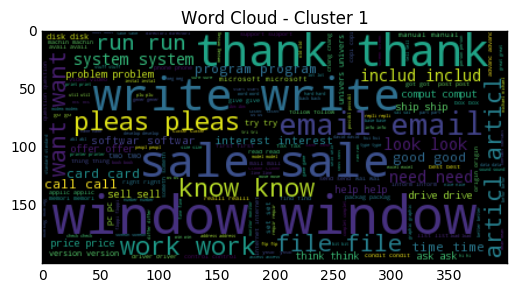

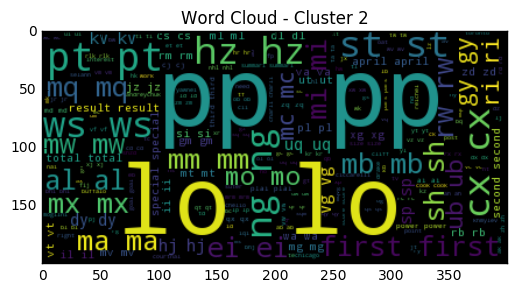

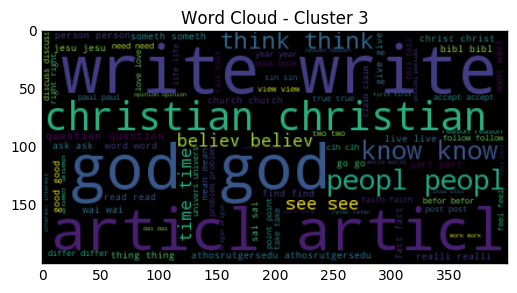

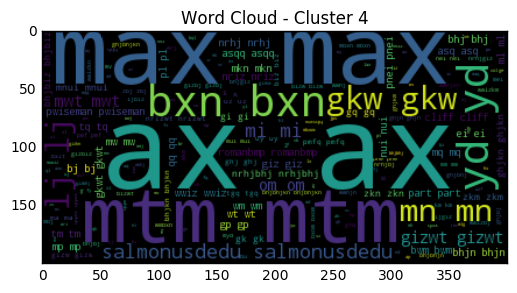

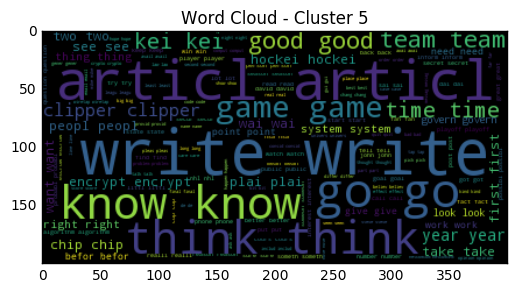

In [122]:
from wordcloud import WordCloud

c1_wordcloud = WordCloud(background_color='black').generate(c1_terms)
plt.imshow(c1_wordcloud)
plt.title('Word Cloud - Cluster 1')
plt.show()

c2_wordcloud = WordCloud(background_color='black').generate(c2_terms)
plt.imshow(c2_wordcloud)
plt.title('Word Cloud - Cluster 2')
plt.show()

c3_wordcloud = WordCloud(background_color='black').generate(c3_terms)
plt.imshow(c3_wordcloud)
plt.title('Word Cloud - Cluster 3')
plt.show()

c4_wordcloud = WordCloud(background_color='black').generate(c4_terms)
plt.imshow(c4_wordcloud)
plt.title('Word Cloud - Cluster 4')
plt.show()

c5_wordcloud = WordCloud(background_color='black').generate(c5_terms)
plt.imshow(c5_wordcloud)
plt.title('Word Cloud - Cluster 5')
plt.show()

### 2e) Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [123]:
from sklearn.metrics import completeness_score, homogeneity_score

my_completeness = completeness_score(np.array(classes_train.T)[0],clustersAssment[:,0])
my_homogeneity = homogeneity_score(np.array(classes_train.T)[0],clustersAssment[:,0])

print('Completeness of Cluster: '+  str(my_completeness))
print('Homogeneity of Clusters: '+ str(my_homogeneity))

Completeness of Cluster: 0.787224550787
Homogeneity of Clusters: 0.544902721632


### 2f) Finally, using your cluster assignments as class labels, categorize each of the documents in the 20% set-aside data into each of the appropriate cluster. Your categorization should be based on Cosine similarity between each test document and each cluster centroids. Present your results in a separate file containing the obtained cluster label for each test document as well as Cosine similarities between each test document and each of the 5 clusters.

In [124]:
results = []

for doc in DT_TFIDF_test:
    
    dic = {}
    sim = []
    cluster=0
    for centroid in centroids:
        cluster+=1
        centroid_doc_sim = 1 - cosSim(doc, centroid) #Need to subtract from 1 as our function returns distance and not similarity
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster)] = centroid_doc_sim
    dic['Predicted Cluster'] = sim.index(max(sim))+1
    results.append(dic)

test_cluster = pd.DataFrame(results)

In [125]:
test_cluster.head(5)

,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Cosine Similarity to Cluster 3,Cosine Similarity to Cluster 4,Cosine Similarity to Cluster 5,Predicted Cluster
0,0.034843,0.001589,0.110389,0.000003,0.043689,3
1,0.072622,0.005124,0.158183,0.000009,0.094771,3
2,0.041890,0.016917,0.015827,0.000014,0.017731,1
3,0.219980,0.003903,0.096596,0.000008,0.114653,1
4,0.097464,0.003849,0.050830,0.000030,0.058897,1


In [126]:
#Write to csv
test_cluster.to_csv("Assignment3_Part2f.csv")